# **IBM Hack CHallenge**
## *AI Based Personalized Electronic Product Recommendation System*
## ***Notebook-1: Implementing the Machine Learning models for product recommendation***

### Participants:
1. Atyam V V R Manoj
2. Narra Varsha



### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import operator
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
# importing the pickle library
import pickle
import os

# to ignore warnings
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')


In [2]:
os.getcwd()

'/content'

### Importing the pre-processed datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
new_Wat = pd.read_csv(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Pre_Processed Datasets/final_Wat')

In [9]:
new_Wat.head()

,UserID,ProductID,rating,tags
0,AZMDNMPDWLLI3,B000PDESIM,5.0,"T o u g h , G o o d L o o k i n g W a t c h..."
1,A2WRNZRR891JYA,B0007OEQZO,5.0,$ 2 6 5 w a t c h a t $ 6 5 ! ! ! i t s a...
2,A29H29DRLPLQHS,B0007OEQZO,5.0,c u t e w a t c h T h e w a t c h i s n i ...
3,A3P3IZ23ULHRFW,B0007OEQZO,5.0,W h a t a g o r g e o u s w a t c h ! ! ! ...
4,A8VPWEUHAUDMU,B0007OEQZO,5.0,B e a u t i f u l E c o - D r i v e w a t c ...


In [10]:
def user_based_model(df):
  print("Sentimental Analysis on the text")
  df['polarity'] = df['tags'].apply(lambda x: TextBlob(x).sentiment.polarity)
  df['review_len'] = df['tags'].apply(lambda x:len(x))
  df['word_count'] = df['tags'].apply(lambda x: len(x.split()))
  
  
  plt.figure(figsize=(8,6))
  sns.distplot(df['rating']);
  
  plt.figure(figsize=(8,6))
  sns.countplot(df['rating']);

  sns.catplot(x='rating', y='polarity', data=df)

  print(df)

  print("There are ",pd.DataFrame(df.ProductID.value_counts()).shape[0]," unique products in the dataset")
  print("There are ",pd.DataFrame(df.UserID.value_counts()).shape[0]," unique users in the dataset")
  
  df.groupby('ProductID').count()

  print("Number of Ratings for each product:")
  num_rating = df.groupby('ProductID').count()['rating']
  num_rating = pd.DataFrame(num_rating)
  print(num_rating)

  num_rating.rename(columns = {'rating':'num_ratings'},inplace = True)
  num_rating.sort_values(by = 'num_ratings',ascending = False)

  #Computing the average rating of the products
  avg_rating = df.groupby('ProductID').mean()['rating']
  avg_rating = pd.DataFrame(avg_rating)
  print(avg_rating)

  avg_rating.rename(columns = {'rating':'avg_ratings'},inplace = True)
  avg_rating.sort_values(by = 'avg_ratings',ascending = False)

  popular_df = num_rating.merge(avg_rating ,on = 'ProductID')
  print(popular_df)

  # making a limit on the ratings
  popular_df[popular_df['num_ratings']>2]
  x = new_Elec.groupby('UserID').count()['rating'] > 3  
  rated_users = x[x].index
  print(rated_users)


  filtered_rating = df[df['UserID'].isin(rated_users)]
  print(filtered_rating)

  y = filtered_rating.groupby('ProductID').count()['rating']>=0
  famous_products = y[y].index
  print(famous_products)

  final_ratings = filtered_rating[filtered_rating['ProductID'].isin(famous_products)]

  pivot_table = final_ratings.pivot_table(index='ProductID',columns='UserID',values='rating')
  pivot_table.fillna(0,inplace = True)
  print("Pivot Table: ")
  print(pivot_table)

  # Implementing the Cosine Similarity function

  print('Applying cosine similarity')

  from sklearn.metrics.pairwise import cosine_similarity
  similarity_scores = cosine_similarity(pivot_table)
  print("Shape of similarity_scores:",similarity_scores.shape)

  sorted(list(enumerate(similarity_scores[70])),key = lambda x:x[1],reverse = True)

  print(similarity_scores)

  return pivot_table,final_ratings,similarity_scores

Sentimental Analysis on the text
               UserID   ProductID  rating  \
0       AZMDNMPDWLLI3  B000PDESIM     5.0   
1      A2WRNZRR891JYA  B0007OEQZO     5.0   
2      A29H29DRLPLQHS  B0007OEQZO     5.0   
3      A3P3IZ23ULHRFW  B0007OEQZO     5.0   
4       A8VPWEUHAUDMU  B0007OEQZO     5.0   
...               ...         ...     ...   
37473   AVI205DG7EPL1  B000HX2X1O     5.0   
37474  A3NBHG35DAJV0C  B000HX2X1O     5.0   
37475  A2ENKMMP4T30K9  B000HX2X14     3.0   
37476  A1ZABTAL4DGTYG  B000HX2X14     5.0   
37477  A1PYMHPF0TFQ3X  B000HX2X14     5.0   

                                                    tags  polarity  \
0      T o u g h ,  G o o d  L o o k i n g  W a t c h...       0.0   
1      $ 2 6 5  w a t c h  a t  $ 6 5 ! ! !  i t s  a...       0.5   
2      c u t e  w a t c h T h e  w a t c h  i s  n i ...       0.0   
3      W h a t  a  g o r g e o u s  w a t c h ! ! !  ...       0.0   
4      B e a u t i f u l  E c o - D r i v e  w a t c ...       0.0   
...   

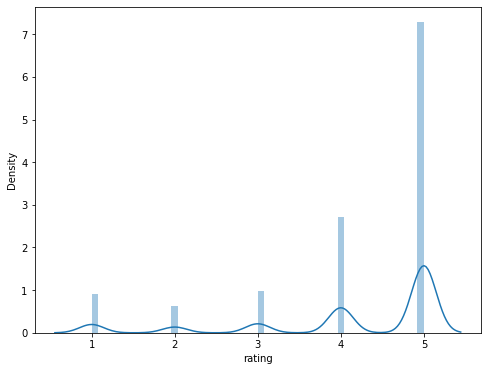

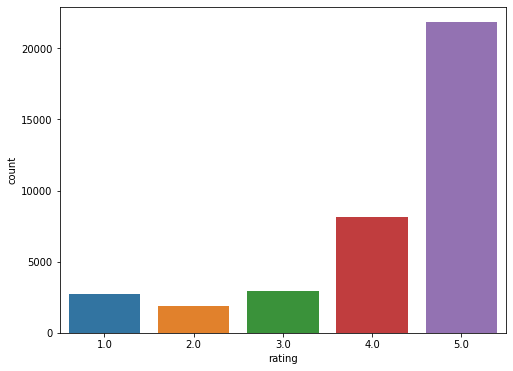

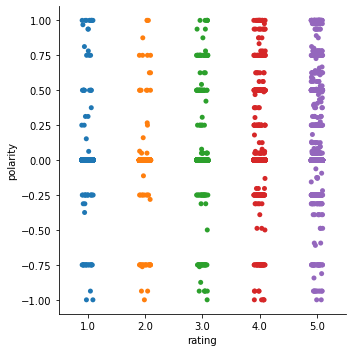

In [11]:
Wat_Pt,Wat_final_ratings,Wat_similarity_scores = user_based_model(new_Wat)

### Converting the variables into pickle files, so they can be used for further analysis

In [12]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Wat_pivot_table.pkl', 'wb') as f:pickle.dump(Wat_Pt,f)

In [13]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Wat_products_dict.pkl', 'wb') as f:pickle.dump(Wat_final_ratings.to_dict(),f)

In [14]:
with open(r'/content/drive/MyDrive/Recommendation-System/ML Mini Project/Wat_similarity_scores.pkl', 'wb') as f:pickle.dump(Wat_similarity_scores,f)